# Explanatory Data Analysis (EDA)

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Datasets

In [69]:
yt_df = pd.read_excel('youtube_statistics.xlsx')

yt_df.head(3)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12


## Descriptive Statistics

In [70]:
yt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

### Transform features type

In [71]:
from datetime import datetime

# Convert 'category_id' to object type
yt_df['category_id'] = yt_df['category_id'].astype(object)

# Convert 'trending_date' to datetime
yt_df['trending_date'] = pd.to_datetime(yt_df['trending_date'])
yt_df['publish_date'] = pd.to_datetime(yt_df['publish_date'])


In [72]:
yt_df['publish_time'] = pd.to_datetime(yt_df['publish_time'], format='%H:%M:%S', errors='coerce').dt.time

### Group features

In [73]:
unique_features = ['title', 'channel_title', 'tags', 'description']
category_features = ['category_id', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']
numerical_features = ['views', 'likes', 'dislikes', 'comment_count', 'No_tags', 'desc_len', 'len_title']
series_feature = ['trending_date', 'publish_time', 'publish_date']

### Check null values

In [74]:
yt_df.isnull().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
dtype: int64

- column `description` memiliki 45 data kosong.

In [75]:
yt_df.duplicated().sum()

4229

- There are 4229 duplicated data

### Describe numerical features

In [76]:
yt_df[numerical_features].describe()

,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000
mean,1.071490e+06,2.745069e+04,1.685363e+03,2714.022043,18.938463,923.079123,70.609361
std,3.207149e+06,9.783129e+04,1.619732e+04,14978.114328,9.843531,815.038867,22.409174
min,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000
25%,1.256040e+05,8.790000e+02,1.090000e+02,83.000000,12.000000,368.000000,53.000000
50%,3.078360e+05,3.126000e+03,3.310000e+02,336.000000,19.000000,677.000000,74.000000
75%,8.066315e+05,1.409500e+04,1.032000e+03,1314.500000,25.000000,1237.000000,91.000000
max,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000


- mean >> median: `views`, `likes`, `dislikes`, `comment_count`, `desc_len`
- mean << median: Tidak ada
- mean ~ median: `No tags`


In [77]:
yt_df[category_features].describe()

,category_id,comments_disabled,ratings_disabled,video_error_or_removed
count,36791,36791,36791,36791
unique,17,2,2,2
top,24,False,False,False
freq,16462,35611,36034,36780


In [78]:
yt_df[series_feature].describe()

,trending_date,publish_date
count,36791,36791
mean,2018-02-26 13:30:23.630779392,2018-02-24 11:20:36.334973440
min,2017-11-14 00:00:00,2017-05-27 00:00:00
25%,2018-01-02 00:00:00,2017-12-31 00:00:00
50%,2018-02-25 00:00:00,2018-02-23 00:00:00
75%,2018-04-24 00:00:00,2018-04-23 00:00:00
max,2018-06-14 00:00:00,2018-06-13 00:00:00


In [79]:
yt_df['publish_time'].describe()

count        36791
unique       12375
top       04:30:00
freq           333
Name: publish_time, dtype: object

yt_df[ser]

## Univariate Analysis

### Visualize categorical features distribution

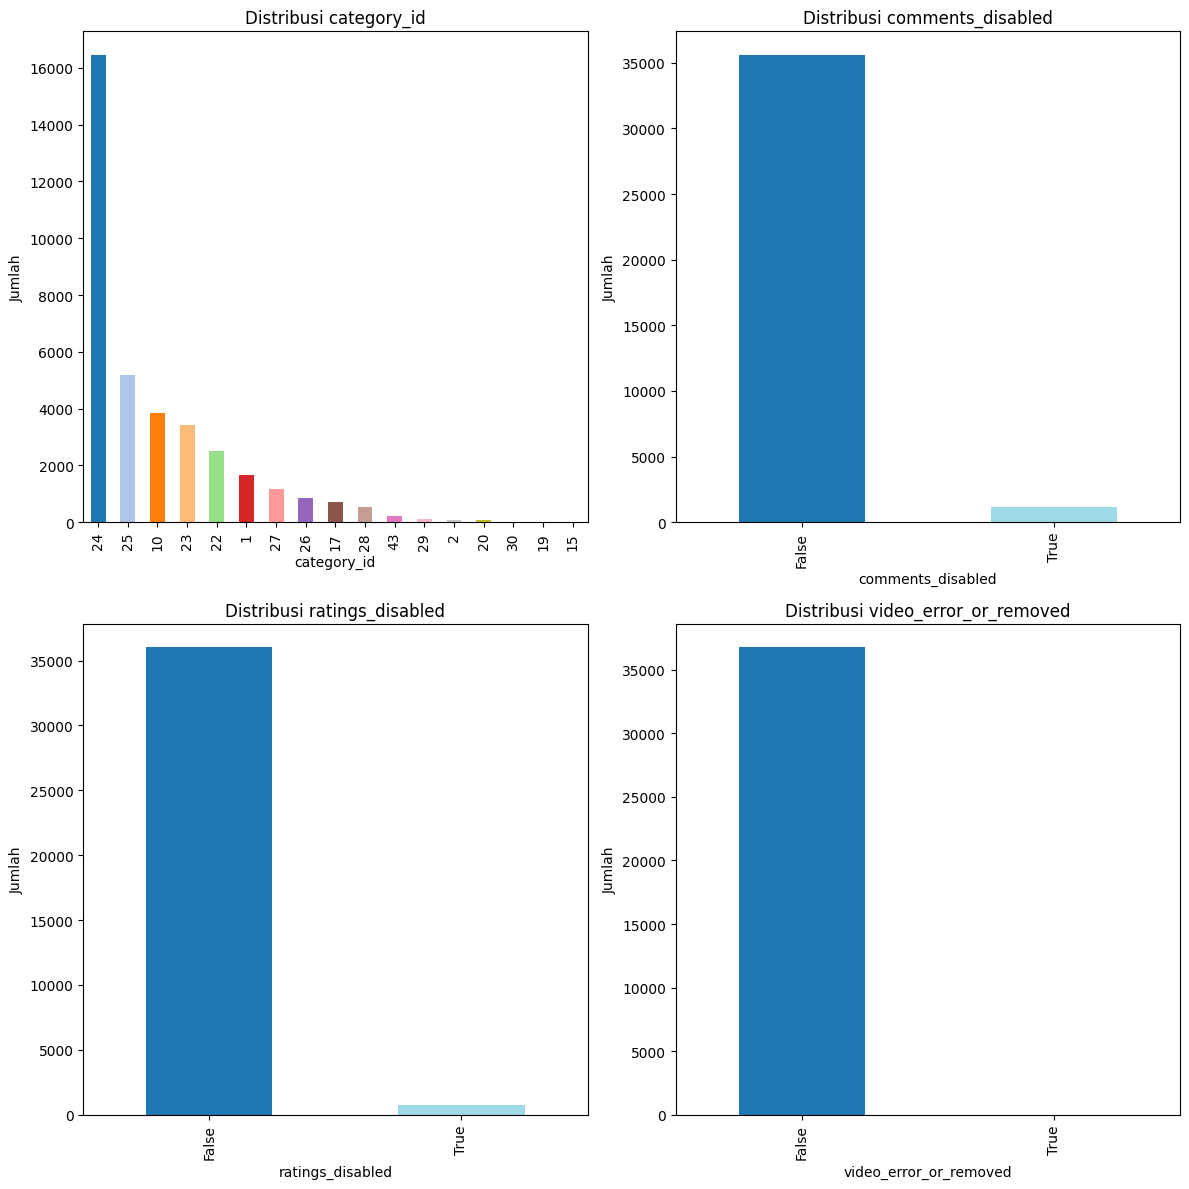

In [13]:
num_plots = len(category_features)

# Create subplots - adjust the number of rows and columns based on num_plots
fig, axes = plt.subplots(nrows=(num_plots // 2) + (num_plots % 2), ncols=2, figsize=(12, 6 * (num_plots // 2)))

# Flatten axes array if there are multiple rows and columns
axes = axes.flatten()

# Use a colormap to generate different colors
cmap = plt.get_cmap('tab20')  # Use a colormap with enough colors for your categories

# Plot each category feature in a separate subplot
for i, column in enumerate(category_features):
    # Get the value counts and categories
    value_counts = yt_df[column].value_counts()
    
    # Generate a list of colors using the colormap
    colors = cmap(np.linspace(0, 1, len(value_counts)))
    
    # Plot the bar plot with different colors for each subcategory
    value_counts.plot(kind="bar", color=colors, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Jumlah")
    axes[i].set_title(f"Distribusi {column}")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### Visualize numerical features distribution

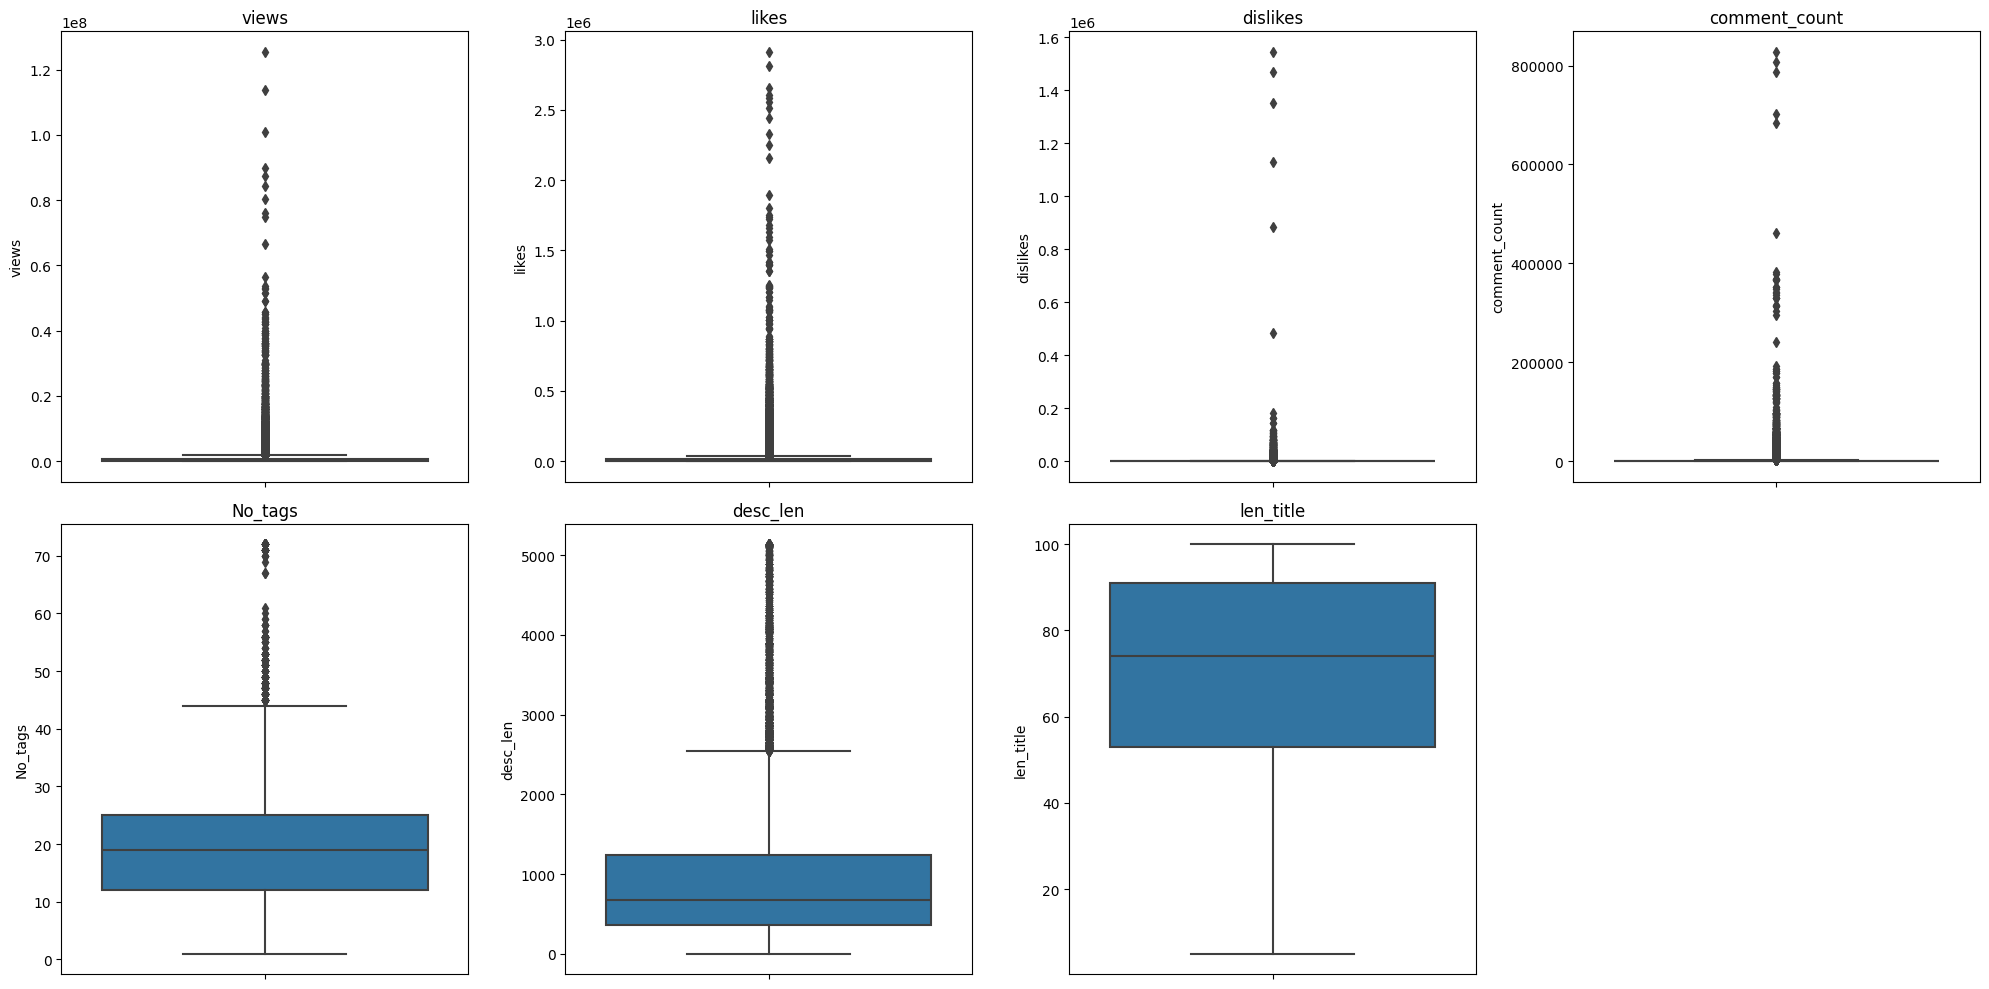

In [14]:
import math

num_plots = len(numerical_features)
num_rows = math.ceil(num_plots / 4)  # Calculate the number of rows needed

plt.figure(figsize=(20, 5 * num_rows))  # Adjust figure size based on the number of rows

for i, col in enumerate(numerical_features):
    plt.subplot(num_rows, 4, i + 1)  # Create subplots in a 4-column grid
    sns.boxplot(y=yt_df[col], orient='v')  # Vertical boxplot
    plt.title(col)

plt.tight_layout()
plt.show()

- features dengan outliers: `views`, `likes`, `dislikes`, `comment_count`, `no_tag`, `desc_len`
- features free outliers: `len_title`

c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

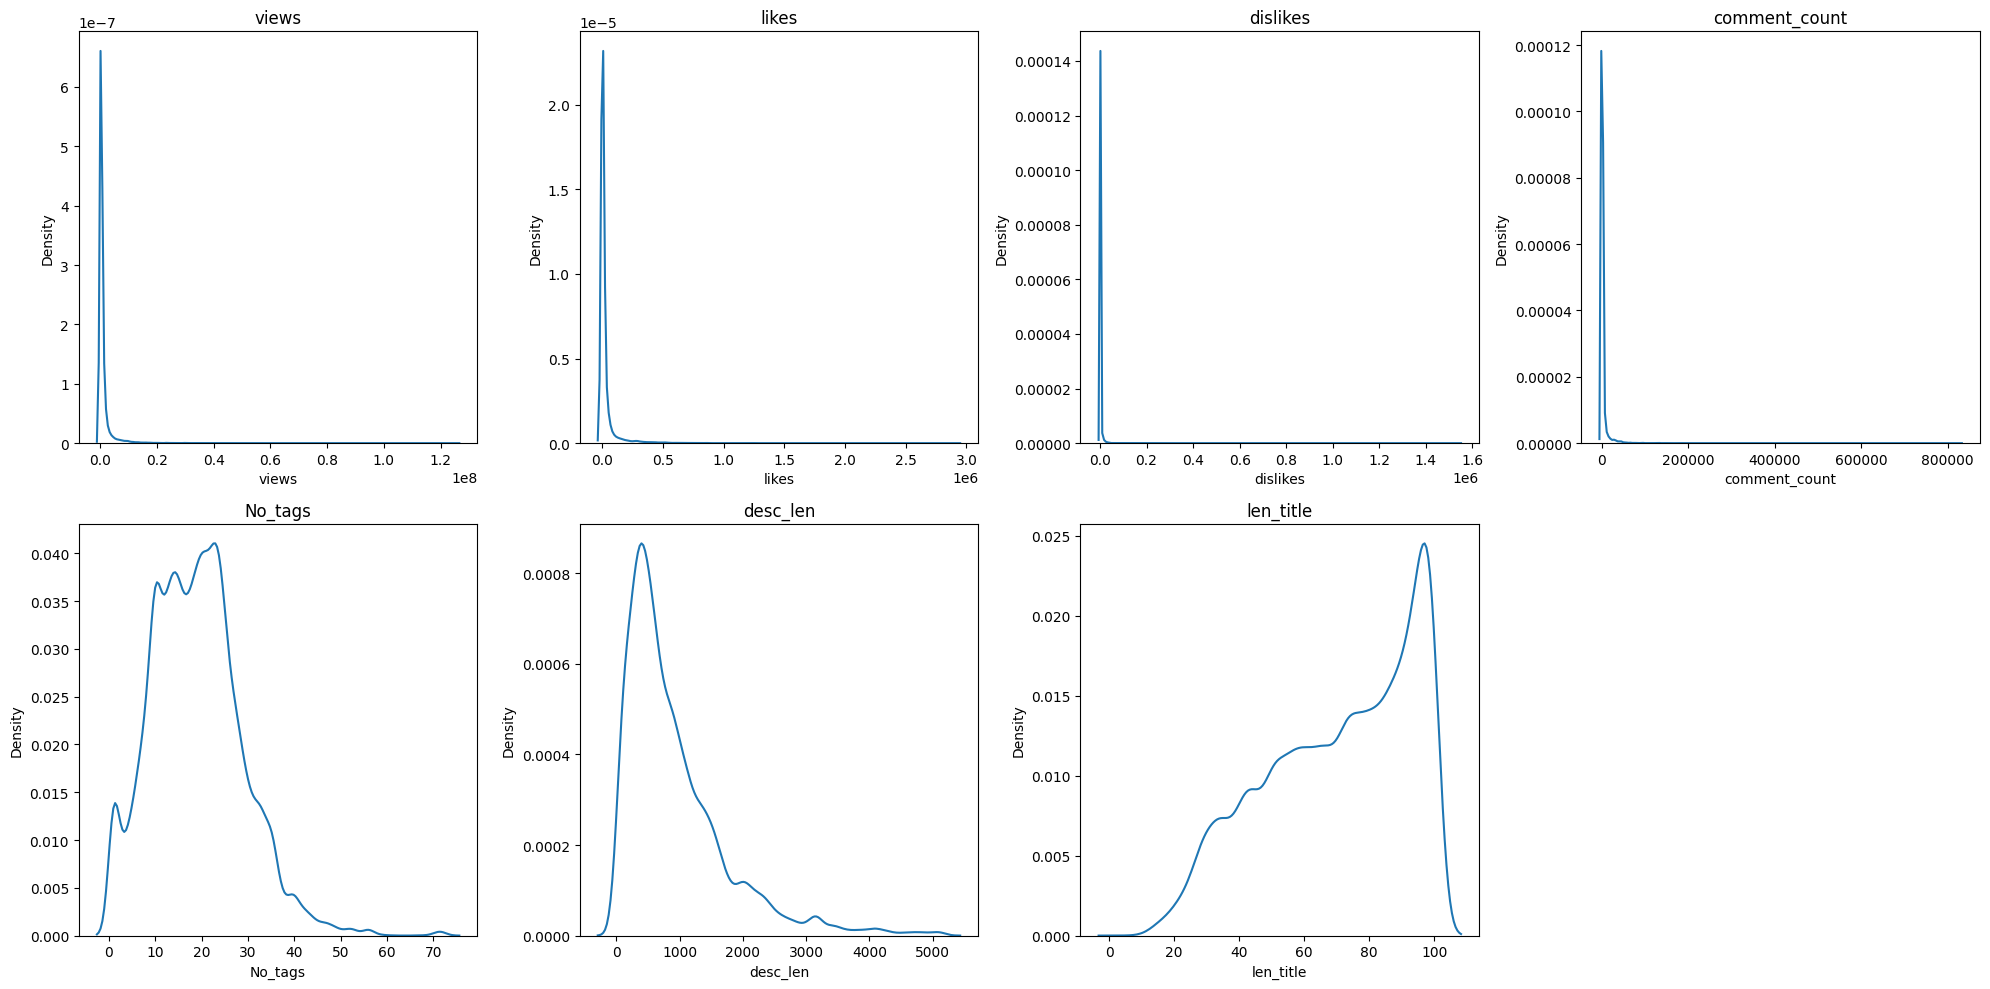

In [15]:
plt.figure(figsize=(20, 5 * num_rows))

for i, col in enumerate(numerical_features):
    plt.subplot(num_rows, 4, i + 1)
    sns.kdeplot(yt_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## Multivariate Analysis

### Numerical Features

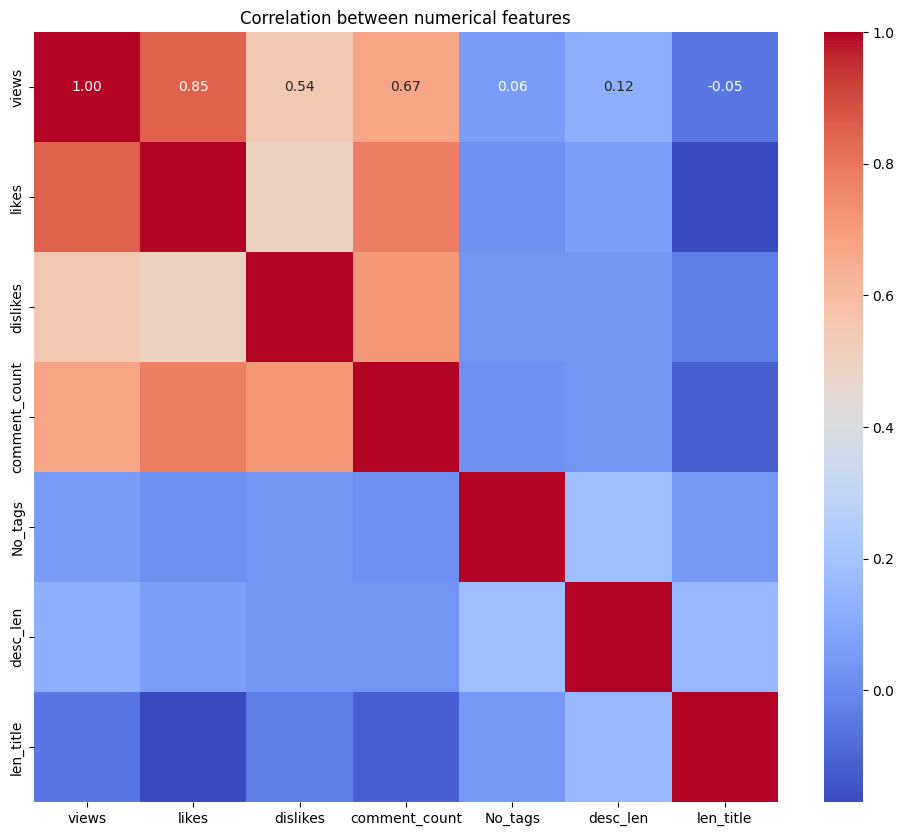

In [16]:
correlation_matrix = yt_df[numerical_features].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between numerical features')
plt.show()

- Features with low correlation between target (`view`):
1. `No_tags`: 0.06
2. `desc_len`: 0.12
3. `len_title`: -0.05

- Two features with high correlation:
1. (`comment_count`, `likes`): 0.78
2. (`comment_count`, `dislikes`): 0.71

Therefore, the above mentioned features will be considered to be removed or further engineered for the modeling.

<Figure size 2400x1000 with 0 Axes>

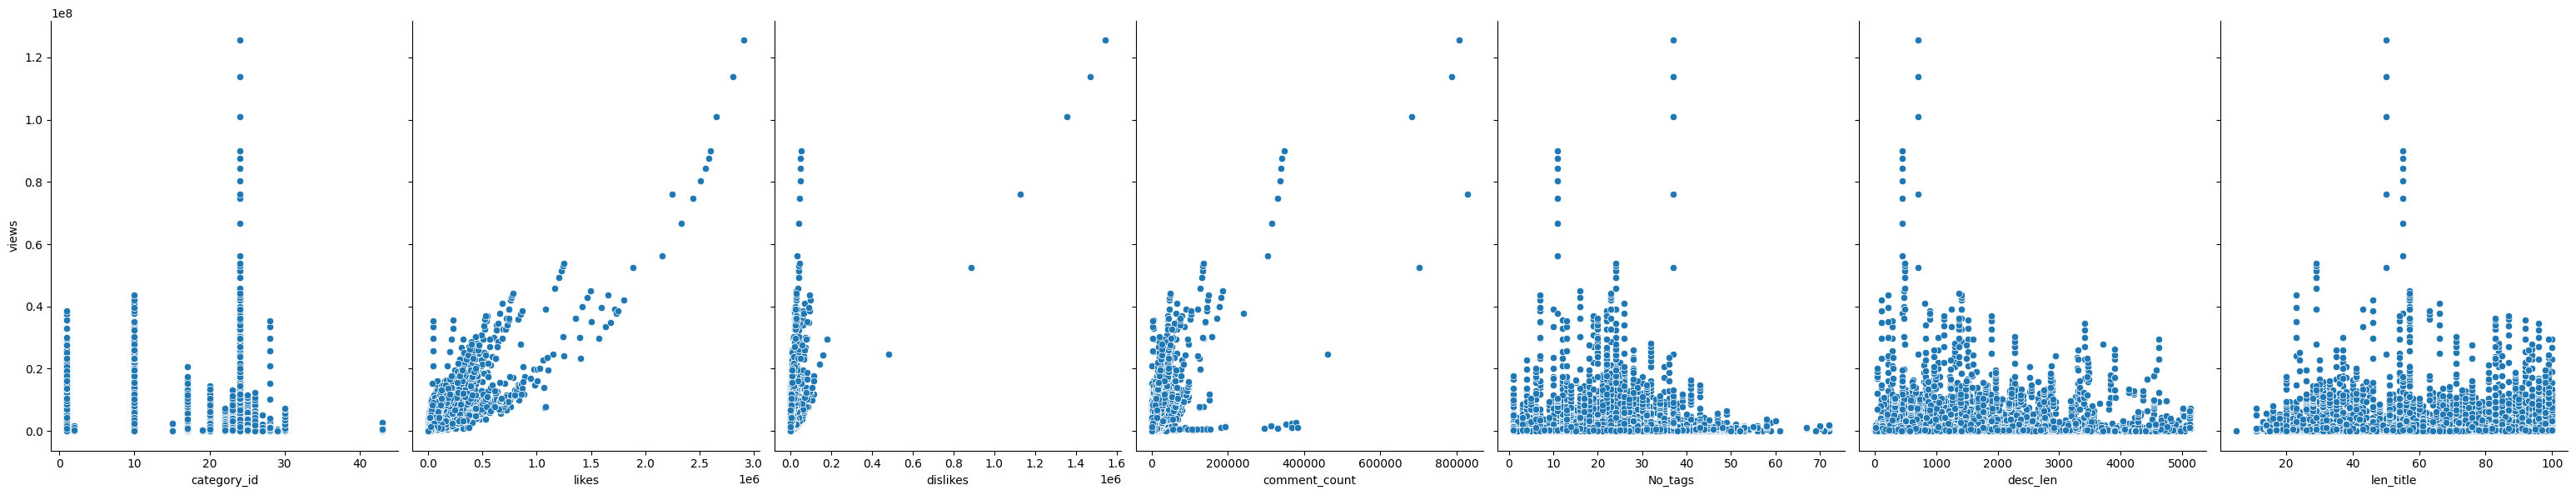

In [17]:
#Feature & Target Correlation

plt.figure(figsize=(24,10))
fig = sns.pairplot(data=yt_df, x_vars=['category_id','likes','dislikes','comment_count','No_tags','desc_len','len_title'], y_vars=['views'], height=6, aspect=0.75);
fig.tight_layout()

### Categorical features

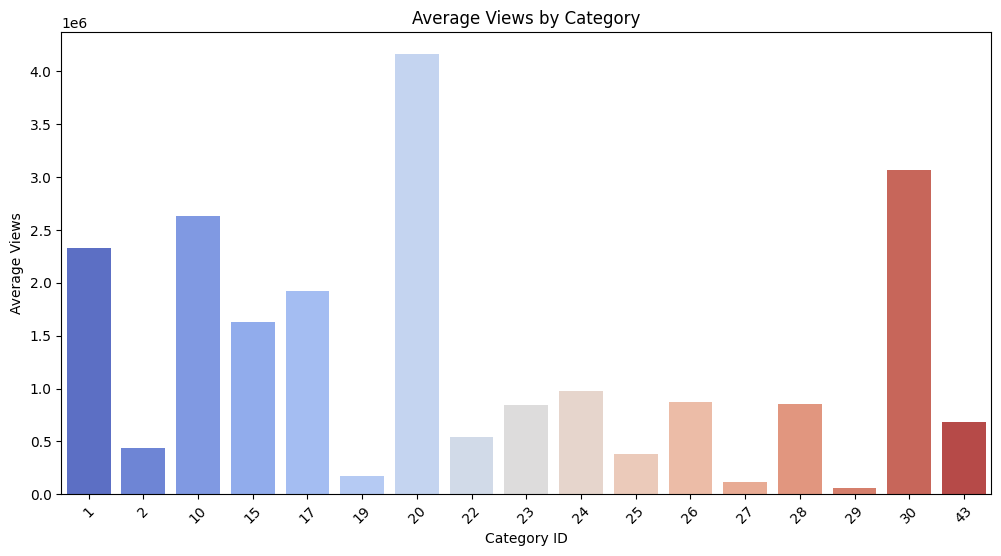

In [18]:
# Category vs Average Views
avg_views_by_category = yt_df.groupby('category_id')['views'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_views_by_category.index, y=avg_views_by_category.values, palette='coolwarm')
plt.title('Average Views by Category')
plt.xlabel('Category ID')
plt.ylabel('Average Views')
plt.xticks(rotation=45)
plt.show()

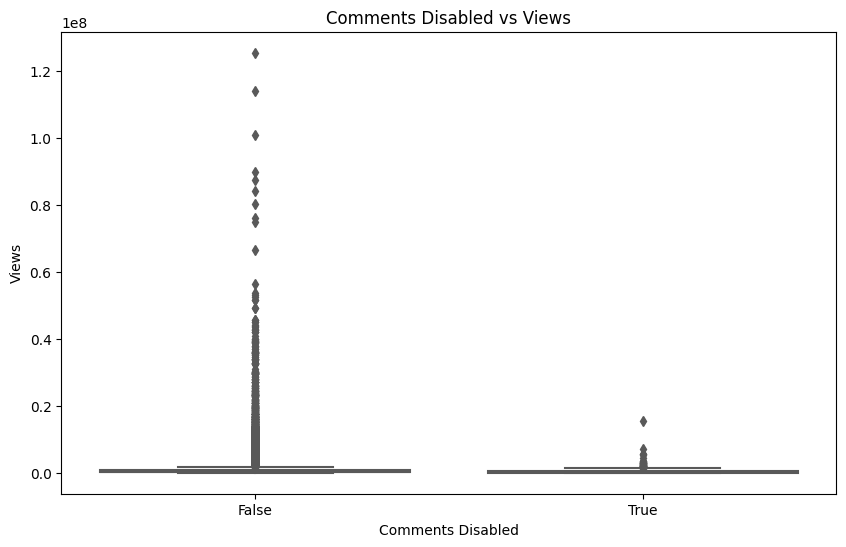

In [19]:
#Comments Disabled vs Views
plt.figure(figsize=(10, 6))
sns.boxplot(x='comments_disabled', y='views', data=yt_df, palette='Set2')
plt.title('Comments Disabled vs Views')
plt.xlabel('Comments Disabled')
plt.ylabel('Views')
plt.show()

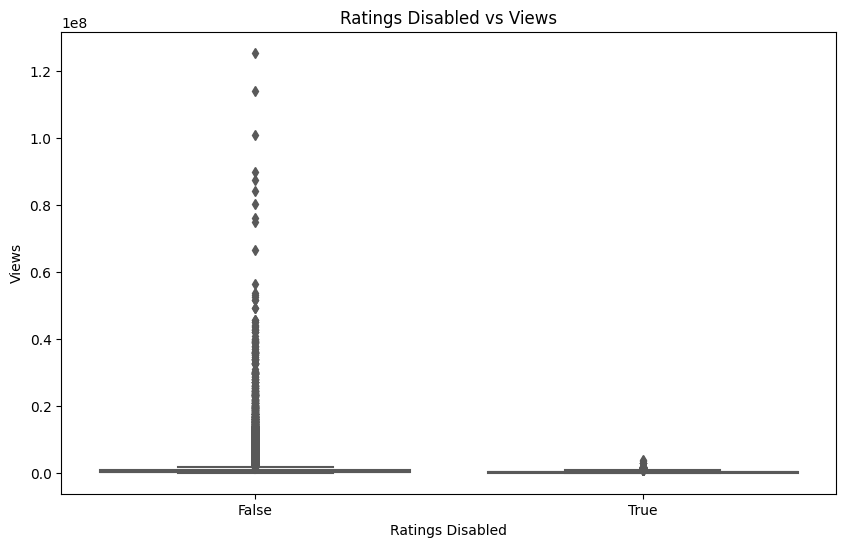

In [20]:
#Ratings Disabled vs Views
plt.figure(figsize=(10, 6))
sns.boxplot(x='ratings_disabled', y='views', data=yt_df, palette='Set2')
plt.title('Ratings Disabled vs Views')
plt.xlabel('Ratings Disabled')
plt.ylabel('Views')
plt.show()

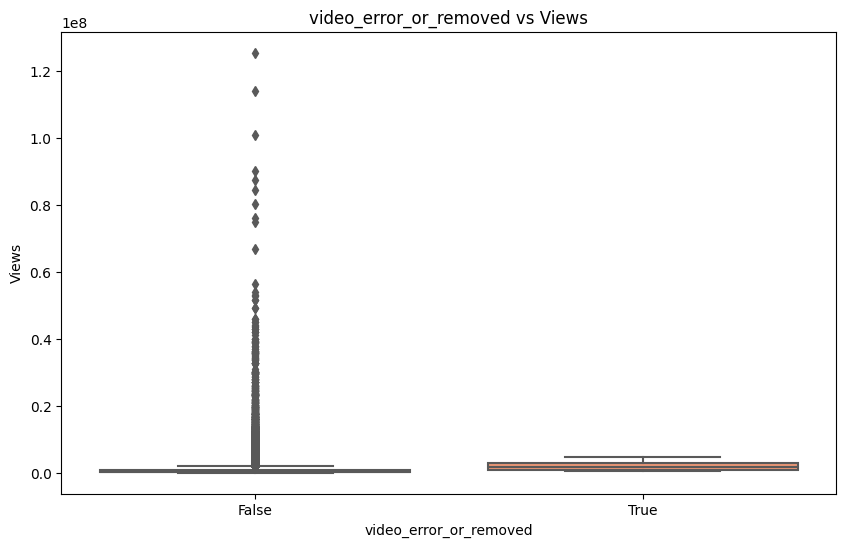

In [21]:
#Video Error or Removed vs Views
plt.figure(figsize=(10, 6))
sns.boxplot(x='video_error_or_removed', y='views', data=yt_df, palette='Set2')
plt.title('video_error_or_removed vs Views')
plt.xlabel('video_error_or_removed')
plt.ylabel('Views')
plt.show()

In [66]:
from scipy.stats import chi2_contingency

for column in category_features:
    # Create a contingency table
    contingency_table = pd.crosstab(yt_df[column], yt_df['views'])
    
    # Perform Chi-Square test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    # Print the result
    print(f"Chi-Square Test for {column}:")
    print(f"Chi2 Statistic: {chi2:.4f}")
    print(f"P-Value: {p:.4f}")
    
    # Interpret the result
    if p < 0.05:
        print(f"**The feature '{column}' is significantly related to the target variable.**\n")
    else:
        print(f"The feature '{column}' is not significantly related to the target variable.\n")

Chi-Square Test for category_id:
Chi2 Statistic: 581347.0269
P-Value: 0.0000
**The feature 'category_id' is significantly related to the target variable.**

Chi-Square Test for comments_disabled:
Chi2 Statistic: 35980.3326
P-Value: 0.0000
**The feature 'comments_disabled' is significantly related to the target variable.**

Chi-Square Test for ratings_disabled:
Chi2 Statistic: 35881.2621
P-Value: 0.0000
**The feature 'ratings_disabled' is significantly related to the target variable.**

Chi-Square Test for video_error_or_removed:
Chi2 Statistic: 17832.3922
P-Value: 1.0000
The feature 'video_error_or_removed' is not significantly related to the target variable.



According to the **Chi-Square Test**, features `category_id`, `comments_disabled`, `rating_disabled` are highly correlated with the target (`views`). Conversely, `video_error_or_removed` is not significantly related to the target (`views`). <br>
Therefore, `video_error_or_removed` will be considered to be discarded from the features for modeling.

In [80]:
yt_df.head(5)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13


In [33]:
yt_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  datetime64[ns]
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  object        
 4   publish_time            36791 non-null  string        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

Convert `publish_time` into 'hour' and 'minute'.

In [44]:
yt_df2 = yt_df.copy()

In [45]:
yt_df2['publish_time'] = yt_df2['publish_time'].astype('string')

In [46]:
# Create new features 'publish_hour' from 'publish_time'
yt_df2['publish_hour'] = yt_df2['publish_time'].apply(lambda x: int(x.split(':')[0]))

In [47]:
# Extract new features from publish_date and trending_date

# Extract day of the week, month, year from datetime columns
yt_df2['publish_day_of_week'] = yt_df2['publish_date'].dt.dayofweek
yt_df2['publish_month'] = yt_df2['publish_date'].dt.month
yt_df2['publish_year'] = yt_df2['publish_date'].dt.year

yt_df2['trending_day_of_week'] = yt_df2['trending_date'].dt.dayofweek
yt_df2['trending_month'] = yt_df2['trending_date'].dt.month
yt_df2['trending_year'] = yt_df2['trending_date'].dt.year


In [49]:
period_series_features = ['publish_day_of_week', 'publish_month', 'publish_year', 
                        'trending_day_of_week', 'trending_month', 'trending_year']

continuous_features = ['publish_hour']

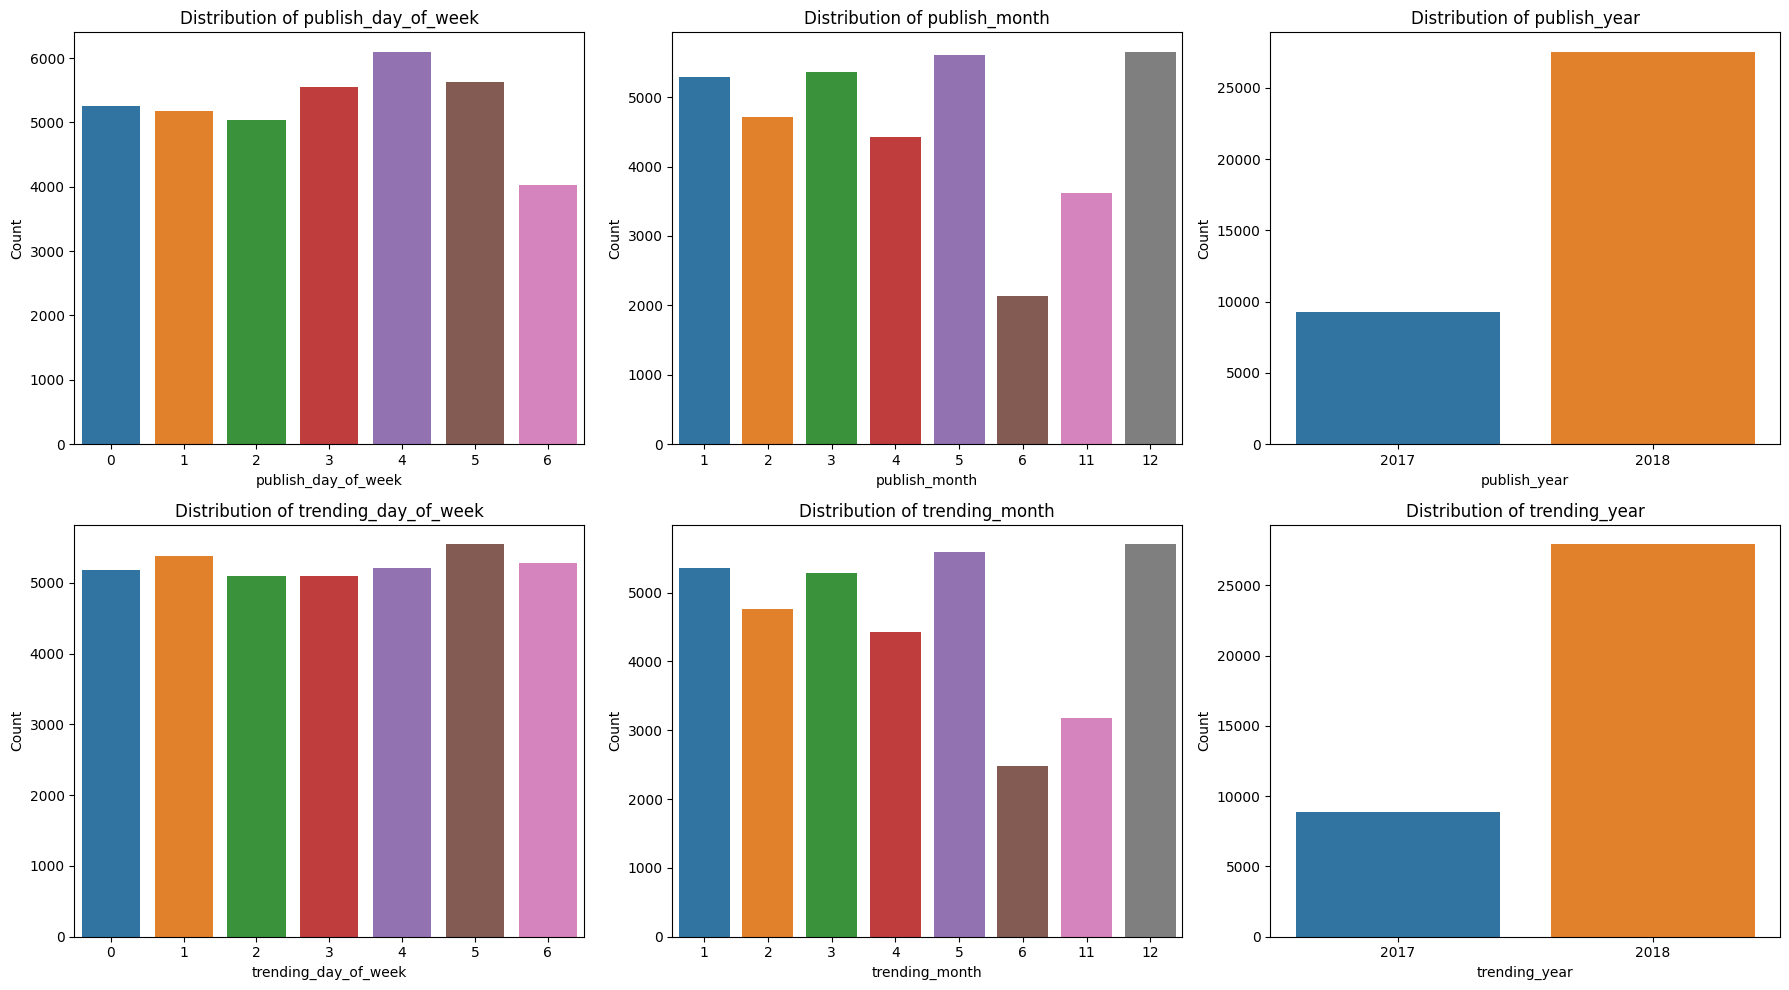

In [51]:
num_features = len(period_series_features)

# Create subplots (rows, columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows and 3 columns
axes = axes.flatten()  # Flatten the axes array to make it easier to iterate over

# Loop through each feature and plot on its respective subplot
for i, feature in enumerate(period_series_features):
    sns.countplot(data=yt_df2, x=feature, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Adjust layout to make it look better
plt.tight_layout()
plt.show()

c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


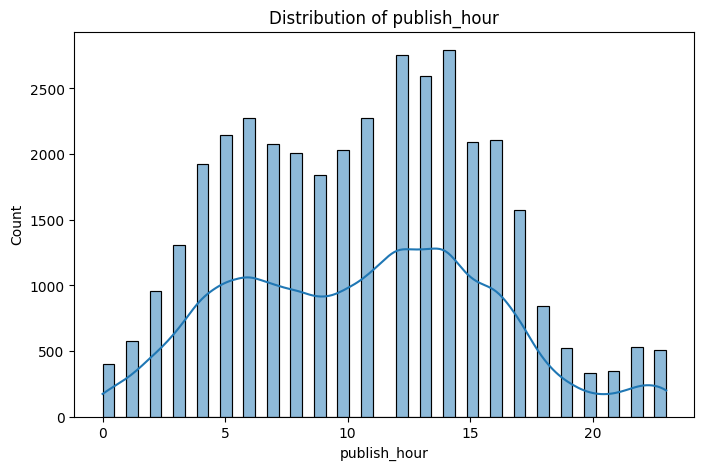

In [53]:
for feature in continuous_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(yt_df2[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

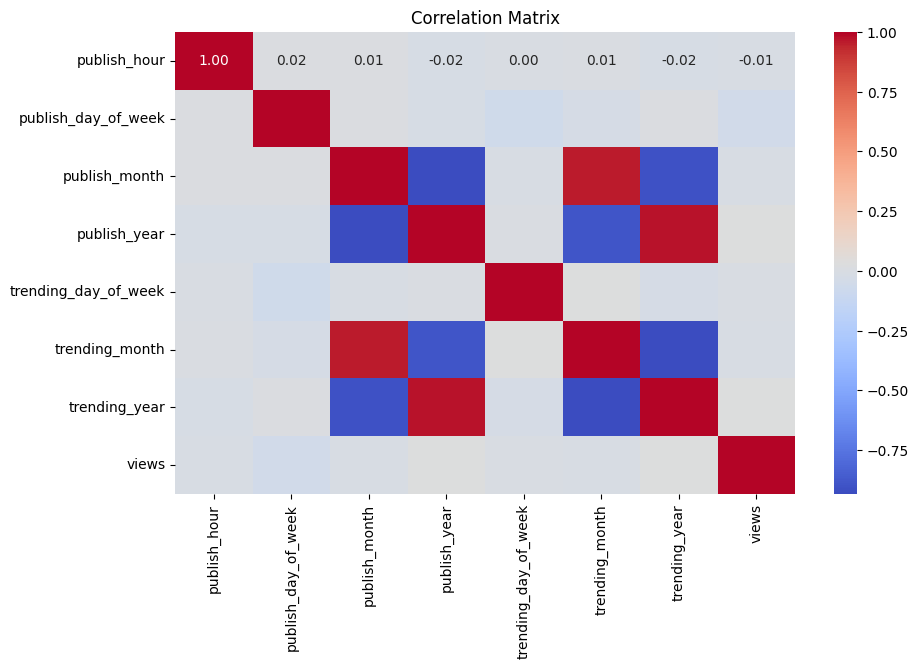

In [54]:
correlation_matrix = yt_df2[['publish_hour', 'publish_day_of_week', 'publish_month', 'publish_year',
                            'trending_day_of_week', 'trending_month', 'trending_year', 'views']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


- Features with low correlation between target (`views`): `publish_hour`, `publish_day_of_week`, `publish_month`, `publish_year`, `trending_day_of_week`, `trending_month`, `trending_year`

- Two features with high correlaton:
1. (`trending_month`, `publish_month`)
2. (`trending_year`, `publish_year`)


According to above correlation, the following features are considered to be discarded/engineered:
1. (`trending_month`, `trending_year`) and/or (`publish_month`, `publish_year`)
2. `publish_hour`, `publish_day_of_week`, `publish_month`, `publish_year`, `trending_day_of_week`, `trending_month`, `trending_year`

In [58]:
# Create a new feature 'is_publish_weekend'
yt_df2['is_publish_weekend'] = yt_df2['publish_day_of_week'].apply(lambda x: 1 if x in [5, 6] else 0)

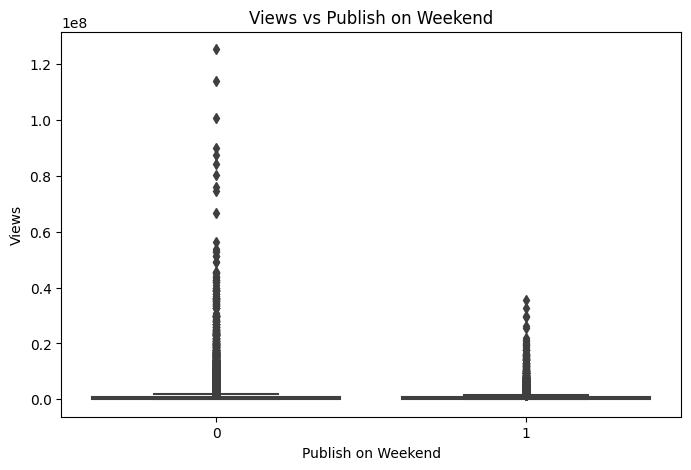

In [59]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=yt_df2, x='is_publish_weekend', y='views')
plt.title('Views vs Publish on Weekend')
plt.xlabel('Publish on Weekend')
plt.ylabel('Views')
plt.show()

# Data Preprocessing

## Data Cleaning

### Drop Nulls

In [60]:
yt_df.dropna(inplace=True)

In [61]:
yt_df.isnull().sum()

trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
No_tags                   0
desc_len                  0
len_title                 0
publish_date              0
dtype: int64

### Drop duplicate rows

In [62]:
yt_df = yt_df.drop_duplicates(keep='first')
print(f'Jumlah duplikat: {yt_df.duplicated().sum()}')

Jumlah duplikat: 0


In [63]:
yt_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32518 entries, 0 to 36769
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           32518 non-null  datetime64[ns]
 1   title                   32518 non-null  object        
 2   channel_title           32518 non-null  object        
 3   category_id             32518 non-null  object        
 4   publish_time            32518 non-null  object        
 5   tags                    32518 non-null  object        
 6   views                   32518 non-null  int64         
 7   likes                   32518 non-null  int64         
 8   dislikes                32518 non-null  int64         
 9   comment_count           32518 non-null  int64         
 10  comments_disabled       32518 non-null  bool          
 11  ratings_disabled        32518 non-null  bool          
 12  video_error_or_removed  32518 non-null  bool       

### Drop Irrelavant Features

In [81]:
irrelavant_features = unique_features + ['No_tags', 'desc_len', 'len_title', 'comment_count', 'video_error_or_removed', 'trending_date', 'publish_time']


In [82]:
yt_df = yt_df.drop(irrelavant_features, axis=1)

yt_df.head()

,category_id,views,likes,dislikes,comments_disabled,ratings_disabled,publish_date
0,1,1096327,33966,798,False,False,2017-11-12
1,25,590101,735,904,True,False,2017-11-13
2,24,473988,2011,243,False,False,2017-11-12
3,23,1242680,70353,1624,False,False,2017-11-12
4,24,464015,492,293,False,False,2017-11-13


### Handling Outliers

In [83]:
columns_outliers = ['views', 'likes', 'dislikes']

def outlier_del(df, column, mode):
    # Accessing columns by name
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - (1.5 * iqr)
    upper_tail = q3 + (1.5 * iqr)
    
    total_outliers = df[(df[column] <= lower_tail) | (df[column] >= upper_tail)].shape[0]
    total_row = df[column].count()
    percent_outliers = round((total_outliers / total_row) * 100, 2)
    
    # Output mode
    if mode == 'summary':
        print(f"Total outliers in {column}: {total_outliers} and outliers percentage: {percent_outliers}%")
    elif mode == 'df':
        return df[(df[column] >= lower_tail) & (df[column] <= upper_tail)]
    else:
        print('Check the input')

# Apply the outlier detection function
for column in columns_outliers:
    outlier_del(yt_df, column, 'summary')


Total outliers in views: 4165 and outliers percentage: 11.32%
Total outliers in likes: 5441 and outliers percentage: 14.79%
Total outliers in dislikes: 4417 and outliers percentage: 12.01%


This outliers will be handled in the following preprocessing step.

## Feature Engineering

### Feature Extraction

Adding new feature `is_publish_weekend` by extracting `publish_date` feature

In [84]:
yt_df['publish_date'] = yt_df['publish_date'].astype(str)

timeget = []
for i in yt_df['publish_date'].str.split():
    time_split = i[:5]
    date_string = ' '.join(time_split)
    timeget.append(date_string)

yt_df['publish_date'] =  pd.to_datetime(timeget)
yt_df['day_of_week'] =yt_df['publish_date'].apply(lambda time: time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

def is_weekend(dmap):
    if dmap.weekday() < 5:
        return False
    else:
        return True
yt_df['is_weekend'] = yt_df['publish_date'].apply(is_weekend)

yt_df.head()

,category_id,views,likes,dislikes,comments_disabled,ratings_disabled,publish_date,day_of_week,is_weekend
0,1,1096327,33966,798,False,False,2017-11-12,6,True
1,25,590101,735,904,True,False,2017-11-13,0,False
2,24,473988,2011,243,False,False,2017-11-12,6,True
3,23,1242680,70353,1624,False,False,2017-11-12,6,True
4,24,464015,492,293,False,False,2017-11-13,0,False


In [86]:
yt_df = yt_df.drop(['publish_date', 'day_of_week'], axis=1)

yt_df

,category_id,views,likes,dislikes,comments_disabled,ratings_disabled,is_weekend
0,1,1096327,33966,798,False,False,True
1,25,590101,735,904,True,False,False
2,24,473988,2011,243,False,False,True
3,23,1242680,70353,1624,False,False,True
4,24,464015,492,293,False,False,False
...,...,...,...,...,...,...,...
36786,23,214378,3291,404,False,False,False
36787,24,406828,1726,478,False,False,False
36788,24,386319,1216,453,False,False,False
36789,24,130263,698,115,False,False,False


In [139]:
import os

output_dir = 'data_files'
os.makedirs(output_dir, exist_ok=True)

yt_df.to_csv(os.path.join(output_dir, 'preprocessed_data.csv'), index=False)

### Train/Test Split

Training set: Test set = 7 : 3

In [117]:
X = yt_df.drop('views', axis=1) 
y = yt_df['views']

### Preprocessing 

**Feature Encoding**

In [120]:
categorical_columns = ['category_id', 'comments_disabled', 'ratings_disabled']
numerical_columns = ['likes', 'dislikes']

In [125]:
from sklearn.preprocessing import LabelEncoder
# Binary Label Encoding
X['comments_disabled'] = X['comments_disabled'].astype(int)
X['ratings_disabled'] = X['ratings_disabled'].astype(int)
X['is_weekend'] = X['is_weekend'].astype(int)
X['category_id'] = X['category_id'].astype(int)

In [126]:
X

,category_id,likes,dislikes,comments_disabled,ratings_disabled,is_weekend
0,1,33966,798,0,0,1
1,25,735,904,1,0,0
2,24,2011,243,0,0,1
3,23,70353,1624,0,0,1
4,24,492,293,0,0,0
...,...,...,...,...,...,...
36786,23,3291,404,0,0,0
36787,24,1726,478,0,0,0
36788,24,1216,453,0,0,0
36789,24,698,115,0,0,0


In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Standardization**

In [133]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   category_id        36791 non-null  int32
 1   likes              36791 non-null  int64
 2   dislikes           36791 non-null  int64
 3   comments_disabled  36791 non-null  int32
 4   ratings_disabled   36791 non-null  int32
 5   is_weekend         36791 non-null  int32
dtypes: int32(4), int64(2)
memory usage: 1.1 MB


In [134]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

X_test[numerical_columns] = scaler.transform(X_test[numerical_columns]) 

In [135]:
X_train

,category_id,likes,dislikes,comments_disabled,ratings_disabled,is_weekend
23009,27,-0.160061,-0.337676,1,0,0
13316,25,-0.230851,-0.267101,0,0,0
17228,24,1.605193,2.892508,0,0,0
35945,24,1.398244,4.623236,0,0,0
5284,23,0.779458,-0.031488,0,0,1
...,...,...,...,...,...,...
16850,24,0.047957,0.218241,0,0,0
6265,24,0.104773,0.661238,0,0,0
11284,25,-0.135013,0.122693,0,0,0
860,24,-0.225735,-0.183496,0,0,0


In [136]:
X_test

,category_id,likes,dislikes,comments_disabled,ratings_disabled,is_weekend
3792,24,-0.052692,-0.017372,0,0,1
13480,24,0.023750,0.934853,0,0,0
21110,25,-0.088813,0.055375,0,0,0
35549,27,0.017564,-0.219327,0,0,0
2952,24,-0.197938,-0.142237,0,0,1
...,...,...,...,...,...,...
7390,23,0.028026,-0.209555,0,0,0
15925,26,1.257579,0.832790,0,0,0
24587,10,0.242917,-0.132465,0,0,1
32530,43,0.020542,0.596091,0,0,0


Save Data for modeling

In [140]:
X_train.to_csv(os.path.join(output_dir, 'X_train.csv'), index=False)
X_test.to_csv(os.path.join(output_dir, 'X_test.csv'), index=False)
y_train.to_csv(os.path.join(output_dir, 'y_train.csv'), index=False)
y_test.to_csv(os.path.join(output_dir, 'y_test.csv'), index=False)